In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
from datetime import date, datetime
from sqlmodel import create_engine, SQLModel
from etl.models import PowerSystemRightNow
from etl.crud import CRUD
from etl import extract

In [27]:
db_connection = os.getenv('DB_CONNECTION')
engine = create_engine(db_connection)
crud = CRUD(engine=engine, table=PowerSystemRightNow)
rows = crud.read()

In [28]:
data = pd.DataFrame(r.dict() for r in rows)

In [29]:
data.set_index('ID').head(5)

,ProductionGe100MW,CO2Emission,SolarPower,OffshoreWindPower,Exchange_Sum,Exchange_DK1_NL,Exchange_DK1_SE,Exchange_DK2_DE,Exchange_Bornholm_SE,Minutes1UTC,Minutes1DK,ProductionLt100MW,OnshoreWindPower,Exchange_DK1_DE,Exchange_DK1_NO,Exchange_DK1_DK2,Exchange_DK2_SE
ID,,,,,,,,,,,,,,,,,
00000328-3D8E-4986-9F59-5044E5FEE33F,213.00000,62.000000,446.00,86.000000,2492.000000,NaN,679.0,-585.000000,9.000000,2019-07-19 12:26:00,2019-07-19 14:26:00,420.000000,195.000000,67.000000,1261.000000,-558.000000,1060.000000
000036D9-7775-451C-A359-C6BAC7FCAF13,46.00000,42.000000,23.00,489.000000,1774.000000,NaN,378.0,-585.000000,19.000000,2019-06-27 19:11:00,2019-06-27 21:11:00,308.000000,751.000000,-156.000000,1144.000000,-591.000000,974.000000
00005462-AE25-427B-BD18-30445EFA5748,274.00000,42.000000,77.00,830.000000,-5.000000,NaN,651.0,-585.000000,17.000000,2019-05-28 17:58:00,2019-05-28 19:58:00,491.000000,2167.000000,-1315.000000,227.000000,-440.000000,999.000000
00006757-1EB4-4066-B6AD-D0130AE35CC5,740.00000,118.000000,0.00,802.000000,-591.000000,NaN,-340.0,497.000000,11.000000,2019-03-25 00:50:00,2019-03-25 01:50:00,437.000000,1341.000000,1175.000000,-1002.000000,-345.000000,-932.000000
00012786-3453-4A0A-B6A1-B86149760AA3,666.27002,142.169998,13.28,587.599976,2028.329956,691.789978,345.0,-277.309998,30.790001,2019-10-23 06:58:00,2019-10-23 08:58:00,716.380005,679.549988,-133.869995,230.039993,-325.329987,1141.890015


In [37]:
aggregated_data = data.resample(
    rule='1M', 
    on='Minutes1UTC',
    label='left'
)[[
    'ProductionGe100MW',
    'ProductionLt100MW',
    'OnshoreWindPower',
    'CO2Emission',
    'SolarPower',
    'OffshoreWindPower',
]].mean()

In [62]:
cols=[
    'ProductionGe100MW',
    'ProductionLt100MW',
    'OnshoreWindPower',
    'CO2Emission',
    'SolarPower',
    'OffshoreWindPower',
]
melted_data = pd.melt(
    frame=aggregated_data.reset_index(), 
    id_vars=['Minutes1UTC'], 
    value_vars=cols,
    var_name='Type', 
    value_name='Value'
)

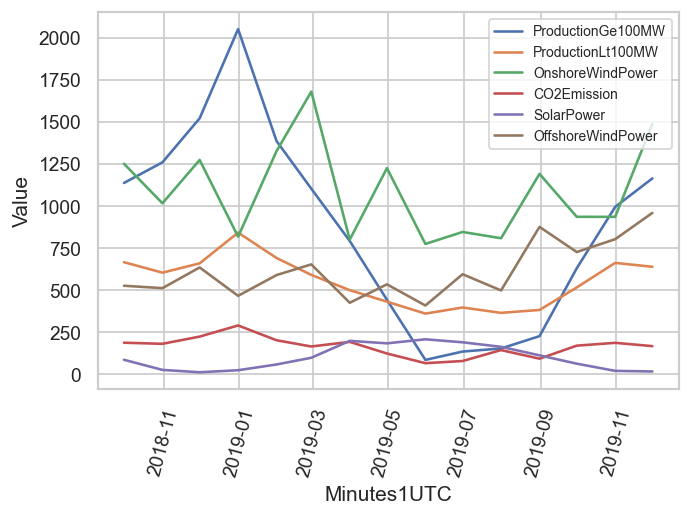

In [81]:
sns.set_theme(style='whitegrid')
fig, ax=plt.subplots(dpi=125)
sns.lineplot(
    x='Minutes1UTC', 
    y='Value', 
    hue='Type', 
    data=melted_data, 
    ax=ax
);
plt.xticks(rotation=75);
ax.legend(loc='upper right', fontsize=8);

<AxesSubplot:xlabel='Minutes1UTC', ylabel='ProductionGe100MW'>

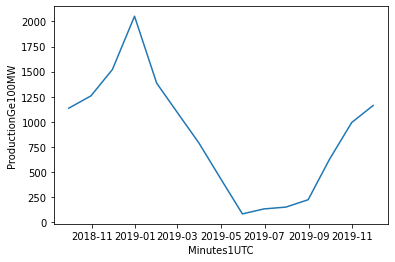

In [57]:
fig, ax=plt.subplots()
sns.lineplot(data=aggregated_data['ProductionGe100MW'], ax=ax);

In [ ]:

df = pd.DataFrame(p.dict() for p in spotprice)
df = df.loc[lambda x: x.PriceArea.isin(["DK1", "DK2"])]
df = df.reset_index()

df_day = df.groupby('PriceArea').resample(rule='1D', on='HourUTC').SpotPriceDKK.mean().reset_index()
df_month = df.groupby('PriceArea').resample(rule='1M', on='HourUTC').SpotPriceDKK.mean().reset_index()
df_month['HourUTC'] = df_month['HourUTC'].dt.strftime('%Y-%m')

fig, ax = plt.subplots()
sns.lineplot(
    x='HourUTC', 
    y='SpotPriceDKK', 
    hue='PriceArea', 
    data=df_day,
    ax=ax
)
fig, ax = plt.subplots()
sns.lineplot(
    x='HourUTC', 
    y='SpotPriceDKK', 
    hue='PriceArea', 
    data=df_month,
    ax=ax
)
plt.show()

print(df)

